<AxesSubplot:>

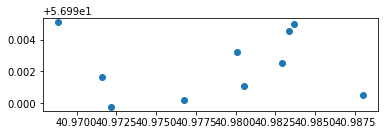

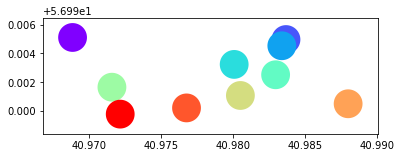

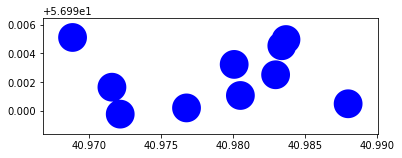

In [91]:
import csv
import geopandas
import matplotlib
from shapely.geometry import Point, mapping, shape
from shapely.ops import cascaded_union
from fiona import collection

#!pip install descartes #only necessary to run this the first time, since I was too lazy to close jupyter and install with the prompt

schema = {'geometry': 'Point', 'properties': {'name':'str'}}
with collection(
    "test_data.shp","w","ESRI Shapefile",schema) as output:
    with open('test_data.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            #print(row) #debug to print the whole .csv file
            point = Point(float(row['X_coord']), float(row['Y_coord']))
            #print(point) #debug statement
            name=row['OBJECTID']
            #print(name) #debug statement
            output.write({
                'properties': {'name': name},
                'geometry': mapping(point)})
            
shapefile=geopandas.read_file("test_data.shp")
shapefile.head()
shapefile.plot() #visualize the points on a simple X/Y plot
            
with collection("test_data.shp", "r") as input:
    schema = {'geometry': 'Polygon','properties':{'name':'str'}}
    with collection("buffer.shp","w","ESRI Shapefile",schema) as output:
        for point in input:
            output.write({'properties':{'name':point['properties']['name']},'geometry':mapping(shape(point['geometry']).buffer(0.001))})
            
shapefile2=geopandas.read_file("buffer.shp")
shapefile2.plot(cmap='rainbow') #assign color scheme to see the different buffers

with collection("buffer.shp", "r") as input:
    schema = input.schema.copy()
    with collection(
            "union.shp", "w", "ESRI Shapefile", schema) as output:
        shapes = []
        for f in input:
            shapes.append(shape(f['geometry']))
        merged = cascaded_union(shapes)
        output.write({
            'properties': {
                'name': 'Buffer Area'
                },
            'geometry': mapping(merged)
            })
        
shapefile3=geopandas.read_file("union.shp")
shapefile3.plot(cmap='winter') #change color scheme to verify the union operation
